In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from datetime import date

azulier     = "#1A3D6F"
doradoier  = '#C65C25'

In [2]:

def load_co2():
    f = "https://raw.githubusercontent.com/EneRDataMx/edtools/main/data/co2_1974_2021.csv"
    df = pd.read_csv(f,index_col=0,parse_dates=True)

    # f = 'https://raw.githubusercontent.com/EneRDataMx/edtools/main/data/co2_mlo_surface-insitu_1_ccgg_DailyData.txt'
    # df = pd.read_csv(f,skiprows=150,delimiter=' ',parse_dates={'date':[1,2,3,4,5,6]})
    # df.date = pd.to_datetime(df.date,format="%Y %m %d %H %M %S")
    # df.set_index('date',inplace=True)
    # df.columns
    # df = df[df.value>0]
    # df = df.resample('D').interpolate(method='time')
    return df[['co2']]


def co2_when_born_face(nombre,anio,mes,dia,imagen):
    df = load_co2()
    head = image.imread(imagen)

    fecha  =  date(anio,mes,dia)

    inicio = df.index[0].date()
    final  = df.index[-1].date()
    with plt.style.context('https://raw.githubusercontent.com/EneRDataMx/edtools/main/mpstlyes/enerdata_square.mplstyle'):


        dates = [inicio,final]
        labels = ['','']

        labels.insert(1,nombre)
        dates.insert(1,fecha)
    #         try:
        values = [df.co2.loc[ date.strftime("%Y-%m-%d")] for date in dates ]
        labels = ['{1}\n{0:%d %b %Y}\n{2:.2f} ppm CO2'.format(d, l,v) for l, d, v in zip (labels, dates,values)]


        min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
        max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)


        timeline = 280
        fig, ax = plt.subplots()


        ax.plot(df.co2,lw=1,c=doradoier)
        ax.set_ylabel("CO2 [ppm]")

        ax.set_xlim(min_date, max_date)
    #     ax.axhline(timeline, xmin=0.05, xmax=0.95, c='deeppink', zorder=2)
        ax.axhline(timeline, xmin=0.05, xmax=0.95, c=doradoier, zorder=2,lw=3)
        ax.scatter(dates, np.full(len(dates),timeline), s=120, c=azulier, zorder=2)
        ax.scatter(dates, np.full(len(dates),timeline), s=30, c='grey', zorder=3 )
        ax.set_yticks(np.arange(320, 411, 30))

        imagebox = OffsetImage(head, zoom = 0.4)
        ab = AnnotationBbox(imagebox, (date(anio, mes,dia),
                                       300), frameon = False)
        ax.add_artist(ab)



        label_offsets = np.zeros(len(dates))
        label_offsets[::2] = timeline - 25
        label_offsets[1::2] = timeline + 10
        ax.grid(True)
        Anio=anio+4
        dates[1] = date(Anio,mes,dia)
        for i, (l, d) in enumerate(zip(labels, dates)):

            ax.text(d, label_offsets[i], l, ha='left', color=doradoier,fontsize=12)


        for spine in ["left", "top", "right", "bottom"]:
            ax.spines[spine].set_visible(False)

        ax.set_xticks([])

convert -size 100x100 xc:none -draw "roundrectangle 0,0,100,100,15,15" mask.png
convert original_picture.png -matte mask.png \
  -compose DstIn -composite picture_with_rounded_corners.png


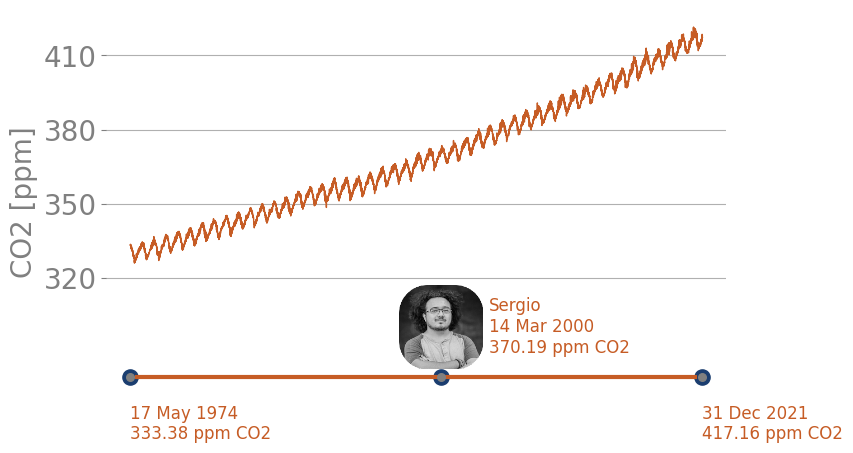

In [4]:
nombre = 'Sergio'
anio = 2000
mes  = 3
dia  = 14
imagen = "img/Sergio_r.png"

co2_when_born_face(nombre,anio,mes,dia,imagen)